In [19]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [20]:
TOPICS_TO_ENG = {
    "Conținut pentru adulți": "Adult content",
    "Artă și design": "Art & Design",
    "Dezvoltare software": "Software development",
    "Crime și investigații": "Crime & Law",
    "Educație și joburi": "Education & Jobs",
    "Electronică și hardware": "Electronics & Hardware",
    "Divertisment": "Entertainment",
    "Viață socială": "Social Life",
    "Modă și frumusețe": "Fashion & Beauty",
    "Finanțe și afaceri": "Finance & Business",
    "Mâncare și băuturi": "Food & Dining",
    "Jocuri": "Games",
    "Sănătate": "Health",
    "Istorie și geografie": "History & Geography",
    "Hobby-uri și casă": "Hobbies & Home",
    "Industrial": "Industrial",
    "Literatură": "Literature",
    "Politică": "Politics",
    "Religie": "Religion",
    "Știință, matematică și tehnologie": "Science, Math & Tech",
    "Software": "Software",
    "Sport și fitness": "Sports & Fitness",
    "Transport": "Transportation",
    "Turism și călătorii": "Travel & Tourism",
}

In [21]:
with open("fineweb_annotated.json", "r") as f:
    fineweb = json.load(f)['topic']

print(fineweb)

with open("fineweb_edu_annotated.json", "r") as f:
    fineweb_edu = json.load(f)['topic']

print(fineweb_edu)

with open("fineweb2_ro_small_results_0.0.json", "r") as f:
    fineweb2 = json.load(f)['topic']

print(fineweb2)

with open("fineweb2_ro_small_results_2.5.json", "r") as f:
    fineweb2_edu = json.load(f)['topic']

print(fineweb2_edu)

{'Finance & Business': 4422272, 'Entertainment': 4421288, 'Politics': 3215999, 'Science, Math & Tech': 1905294, 'Fashion & Beauty': 1927870, 'Religion': 1663634, 'Sports & Fitness': 4237686, 'Literature': 1594033, 'Crime & Law': 2075854, 'Software development': 1022637, 'Software': 1664584, 'Transportation': 1796631, 'Travel & Tourism': 1755784, 'Education & Jobs': 3439785, 'Health': 3513509, 'Food & Dining': 2094745, 'Hobbies & Home': 3807923, 'History & Geography': 865220, 'Social Life': 2401087, 'Industrial': 1318906, 'Art & Design': 1744205, 'Electronics & Hardware': 1350573, 'Games': 1445038, 'Adult content': 444228}
{'Literature': 2195456, 'Science, Math & Tech': 12799330, 'Health': 10533980, 'Hobbies & Home': 1760205, 'Transportation': 819921, 'Art & Design': 1188544, 'History & Geography': 5461138, 'Education & Jobs': 5955260, 'Software development': 1061806, 'Religion': 2060087, 'Politics': 2529266, 'Software': 821519, 'Social Life': 456580, 'Finance & Business': 1155275, 'Ent

In [22]:
def reorder(counts_dict, order):
    return {k: counts_dict.get(k, 0) for k in order}

def to_english(counts_dict):
    return {TOPICS_TO_ENG.get(k, k): v for k, v in counts_dict.items()}

fineweb = reorder(fineweb, list(TOPICS_TO_ENG.values()))
fineweb_edu = reorder(fineweb_edu, list(TOPICS_TO_ENG.values()))
fineweb2 = reorder(to_english(fineweb2), list(TOPICS_TO_ENG.values()))
fineweb2_edu = reorder(to_english(fineweb2_edu), list(TOPICS_TO_ENG.values()))

print(fineweb)
print(fineweb_edu)
print(fineweb2)
print(fineweb2_edu)

{'Adult content': 444228, 'Art & Design': 1744205, 'Software development': 1022637, 'Crime & Law': 2075854, 'Education & Jobs': 3439785, 'Electronics & Hardware': 1350573, 'Entertainment': 4421288, 'Social Life': 2401087, 'Fashion & Beauty': 1927870, 'Finance & Business': 4422272, 'Food & Dining': 2094745, 'Games': 1445038, 'Health': 3513509, 'History & Geography': 865220, 'Hobbies & Home': 3807923, 'Industrial': 1318906, 'Literature': 1594033, 'Politics': 3215999, 'Religion': 1663634, 'Science, Math & Tech': 1905294, 'Software': 1664584, 'Sports & Fitness': 4237686, 'Transportation': 1796631, 'Travel & Tourism': 1755784}
{'Adult content': 2838, 'Art & Design': 1188544, 'Software development': 1061806, 'Crime & Law': 806362, 'Education & Jobs': 5955260, 'Electronics & Hardware': 504713, 'Entertainment': 442112, 'Social Life': 456580, 'Fashion & Beauty': 138996, 'Finance & Business': 1155275, 'Food & Dining': 656096, 'Games': 215560, 'Health': 10533980, 'History & Geography': 5461138, '

In [23]:
def normalize_counts(counts_dict):
    total = sum(counts_dict.values())
    return {k: v / total for k, v in counts_dict.items()}

fineweb = normalize_counts(fineweb)
fineweb_edu = normalize_counts(fineweb_edu)
fineweb2 = normalize_counts(fineweb2)
fineweb2_edu = normalize_counts(fineweb2_edu)

print(fineweb)
print(fineweb_edu)
print(fineweb2)
print(fineweb2_edu)

{'Adult content': 0.008206871815061063, 'Art & Design': 0.03222324314133414, 'Software development': 0.018892664965600096, 'Crime & Law': 0.038350278876571865, 'Education & Jobs': 0.0635481657310431, 'Electronics & Hardware': 0.024951105035888023, 'Entertainment': 0.08168090231472959, 'Social Life': 0.04435878248514168, 'Fashion & Beauty': 0.03561635458841354, 'Finance & Business': 0.0816990811820365, 'Food & Dining': 0.03869927987483924, 'Games': 0.02669629477181134, 'Health': 0.06491017672020534, 'History & Geography': 0.01598447110904115, 'Hobbies & Home': 0.07034931598778728, 'Industrial': 0.024366074353968963, 'Literature': 0.029448896737660008, 'Politics': 0.05941384052865772, 'Religion': 0.03073473753382789, 'Science, Math & Tech': 0.035199275210038426, 'Software': 0.030752288269540875, 'Sports & Fitness': 0.07828895475854483, 'Transportation': 0.033191785110269885, 'Travel & Tourism': 0.032437158897987456}
{'Adult content': 5.243051363521276e-05, 'Art & Design': 0.0219577069760

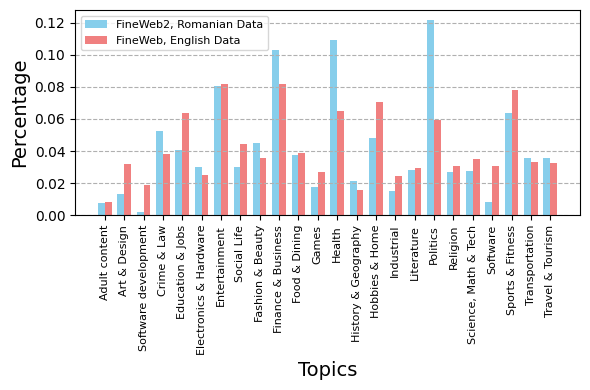

In [24]:
fig, ax = plt.subplots(figsize=(6, 4))
bar_width = 0.35
index = np.arange(len(fineweb))

bar1 = ax.bar(index - bar_width/2, list(fineweb2.values()), bar_width, label='FineWeb2, Romanian Data', color='skyblue')
bar2 = ax.bar(index + bar_width/2, list(fineweb.values()), bar_width, label='FineWeb, English Data', color='lightcoral')
ax.set_xlabel('Topics', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)

ax.set_xticks(index)
ax.set_xticklabels(list(fineweb.keys()), rotation=90, ha='center', fontsize=8)
ax.legend(fontsize=8)
ax.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('../photos/fineweb_fineweb2.png', dpi=500)
plt.show()

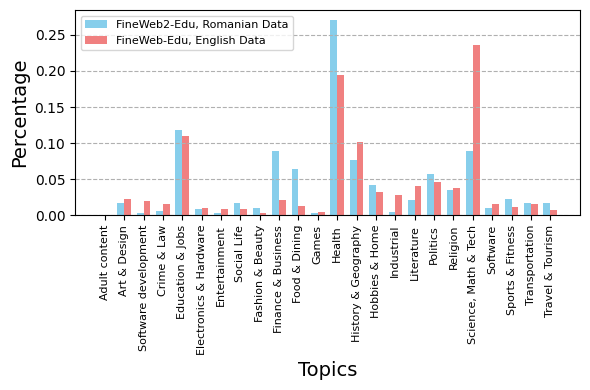

In [25]:
fig, ax = plt.subplots(figsize=(6, 4))
bar_width = 0.35
index = np.arange(len(fineweb))

bar1 = ax.bar(index - bar_width/2, list(fineweb2_edu.values()), bar_width, label='FineWeb2-Edu, Romanian Data', color='skyblue')
bar2 = ax.bar(index + bar_width/2, list(fineweb_edu.values()), bar_width, label='FineWeb-Edu, English Data', color='lightcoral')
ax.set_xlabel('Topics', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)

ax.set_xticks(index)
ax.set_xticklabels(list(fineweb_edu.keys()), rotation=90, ha='center', fontsize=8)
ax.legend(fontsize=8)
ax.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('../photos/fineweb_edu_fineweb2_edu.png', dpi=500)
plt.show()